# Indicators of Heavy Traffic on I-94

## Introduction

In this project, we're going to analyse a dataset about the westbound traffic of the [I-94 Interstate highway](https://en.wikipedia.org/wiki/Interstate_94). The dataset was made available by John Hogue, and can found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. Understanding what indicators contribute to the severity of traffic could potentially aid in making informed and  data-driven decisions on how to prepare, and potentially, reduce the impact of these.

A short description of each of the categories in our dataset are as follows:

* `holiday` - Categorical US National holidays plus regional holiday, Minnesota State Fair
* `temp` - Numeric Average temp in kelvin
* `rain_1h` - Numeric Amount in mm of rain that occurred in the hour
* `snow_1h` - Numeric Amount in mm of snow that occurred in the hour
* `clouds_all` - Numeric Percentage of cloud cover
* `weather_main` - Categorical Short textual description of the current weather
* `weather_description` - Categorical Longer textual description of the current weather
* `date_time` - DateTime Hour of the data collected in local CST time
* `traffic_volume` - Numeric Hourly I-94 ATR 301 reported westbound traffic volume

## The I-94 Traffic Dataset

In [8]:
import pandas as pd

traffic = pd.read_csv("Metro_Interstate_Traffic_Volume.csv")

traffic.head()  ## First five rows of dataframe.

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [6]:
traffic.tail()  ## Last five rows of dataframe. 

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


Our data shows us that there are 48203 rows and 9 columns. Each entry describes hourly weather features  and holidays included for impacts on traffic volume, between 09:00, 02/10/2012 and 23:00, 30/09/2018. Moreover, there are no non-null values, and three different dtypes: object, float64, and in64. 

The [dataset documentation](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume) mentions that a station located approximately midway between Minneapolois and Saint Paul recorded the traffic data. Also the station only recorded westbound traffic (moving from east to west). Therefore, the results of our analysis will only be relevant for westbound traffic in proximity of this station, and not for the entire I-94 highway. 

## Analyzing Traffic Volume

We're going to start our analysis by examining the distribution of the traffic_volume column.

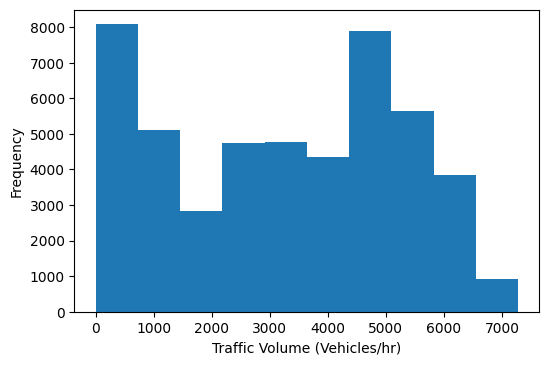

In [12]:
import matplotlib.pyplot as plt 
%matplotlib inline 

traffic["traffic_volume"].plot.hist()
plt.xlabel("Traffic Volume (Vehicles/hr)")
plt.show()

In [10]:
traffic["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 9:00, 02/10/2012 and 23:00, 30/09/2018, the hourly traffic volume ranged from a minimum of 0 to a maximum of 7280, with an average of 3260, and median of 3380.

The histogram shows us that there are two peaks ~8000 incidence values 0-500 vehicles/hr and 4500-5000 vehicles/hr. These two peaks may represent differences in traffic volume due to the time of day i.e. periods at night may record less traffic volume than during the day time, rush-hour periods.  

With this in mind, let's compare day-time data with night-time data, to see if different periods of the day influence traffic volume:

## Traffic Volume: Day vs. Night

As the recorded data were collected every hour of the day, we will divide the dataset into two parts. Although, not perfect, these represent day-time and night-time periods:

* Day-time: Between 07:00-18:59
* Night-time: Between 19:00-07:00

In [33]:
## Converting the date_time column to datetime ##

traffic["date_time"] = pd.to_datetime(traffic["date_time"])

## Isolating day and night time data ##

day_time = traffic.copy()[(traffic["date_time"].dt.hour >= 7) & (traffic["date_time"].dt.hour < 19)]
print(day_time.shape)

night_time = traffic.copy()[(traffic["date_time"].dt.hour >= 19) | (traffic["date_time"].dt.hour < 7)]
print(night_time.shape)

(23877, 9)
(24327, 9)
